✅ Dataset Loaded Successfully!
Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698


Original Target Unique Values: [-1.02669772  0.97399651]
Features shape: (1025, 13)
Target shape: (1025,)
Target unique values after conversion: [0 1]

🔹 Calculating Feature Importance using Random Forest...


C:\Users\Linda\AppData\Local\Temp\ipykernel_24460\2045356935.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


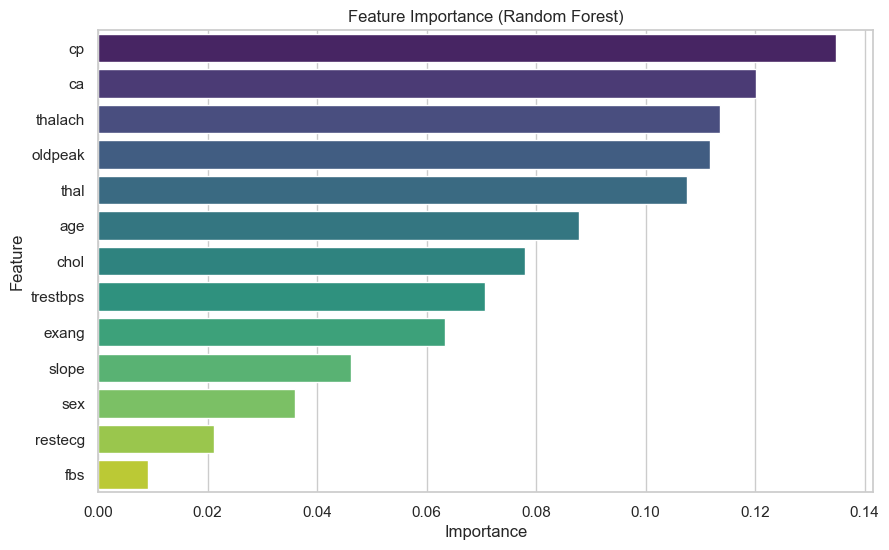


Top 10 Important Features:


,Feature,Importance
2,cp,0.134821
11,ca,0.120084
7,thalach,0.113658
9,oldpeak,0.111751
12,thal,0.107514
0,age,0.087879
4,chol,0.078043
3,trestbps,0.070650
8,exang,0.063298
10,slope,0.046231



🔹 Applying Recursive Feature Elimination (RFE)...

Selected Features by RFE:
['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

🔹 Applying Chi-Square Test...

Selected Features by Chi-Square Test:
['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

✅ Final Selected Features for Modeling:
{'cp', 'sex', 'exang', 'ca', 'thal', 'thalach', 'trestbps', 'chol', 'slope', 'age', 'oldpeak'}

Shape of reduced dataset: (1025, 12)


,cp,sex,exang,ca,thal,thalach,trestbps,chol,slope,age,oldpeak,target
0,-0.915755,0.661504,-0.712287,1.209221,1.089852,0.821321,-0.377636,-0.659332,0.995433,-0.268437,-0.060888,-1.026698
1,-0.915755,0.661504,1.403928,-0.731971,1.089852,0.255968,0.479107,-0.833861,-2.243675,-0.158157,1.727137,-1.026698
2,-0.915755,0.661504,1.403928,-0.731971,1.089852,-1.048692,0.764688,-1.396233,-2.243675,1.716595,1.301417,-1.026698
3,-0.915755,0.661504,-0.712287,0.238625,1.089852,0.516900,0.936037,-0.833861,0.995433,0.724079,-0.912329,-1.026698
4,-0.915755,-1.511706,-0.712287,2.179817,-0.522122,-1.874977,0.364875,0.930822,-0.624121,0.834359,0.705408,-1.026698



✅ Reduced dataset saved as 'heart_selected_features.csv'


In [1]:
# =====================================
# STEP 1: IMPORT LIBRARIES
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# For better visualization
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# =====================================
# STEP 2: LOAD CLEANED DATASET
# =====================================
df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# =====================================
# STEP 3: SEPARATE FEATURES & TARGET
# =====================================
# Automatically detect "target" column
if 'target' in df.columns:
    X = df.drop("target", axis=1)
    y = df["target"]
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

print("Original Target Unique Values:", y.unique())

# 🔹 FIX: Convert multi-class target into binary classification
# If value > 0 => 1 (Disease), else 0 (No Disease)
y = y.apply(lambda x: 1 if x > 0 else 0)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target unique values after conversion:", y.unique())

# =====================================
# STEP 4: FEATURE IMPORTANCE (RANDOM FOREST)
# =====================================
print("\n🔹 Calculating Feature Importance using Random Forest...")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importance scores
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

print("\nTop 10 Important Features:")
display(importance_df.head(10))

# =====================================
# STEP 5: RECURSIVE FEATURE ELIMINATION (RFE)
# =====================================
print("\n🔹 Applying Recursive Feature Elimination (RFE)...")
model = LogisticRegression(max_iter=500, solver="liblinear")
rfe = RFE(model, n_features_to_select=8)  # Choose top 8 features
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(list(rfe_features))

# =====================================
# STEP 6: CHI-SQUARE TEST
# =====================================
print("\n🔹 Applying Chi-Square Test...")
# Chi-Square works only with non-negative features, so scale them first
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_selector = SelectKBest(score_func=chi2, k=8)  # Top 8 features
chi_selector.fit(X_scaled, y)
chi_features = X.columns[chi_selector.get_support()]

print("\nSelected Features by Chi-Square Test:")
print(list(chi_features))

# =====================================
# STEP 7: FINAL SELECTED FEATURES
# =====================================
# Combine results from all three methods
selected_features = set(rfe_features) | set(chi_features) | set(importance_df.head(8)["Feature"])

print("\n✅ Final Selected Features for Modeling:")
print(selected_features)

# Create a reduced dataset with only the best features + target
df_selected = df[list(selected_features) + ["target"]]
print("\nShape of reduced dataset:", df_selected.shape)
display(df_selected.head())

# =====================================
# STEP 8: SAVE REDUCED DATASET
# =====================================
df_selected.to_csv("heart_selected_features.csv", index=False)
print("\n✅ Reduced dataset saved as 'heart_selected_features.csv'")
